# <FONT COLOR='red'>***Multiple Linear Regression Exercise***</FONT>
---
---
The present notebook seek reproduce an exercise present in the [**RPubs**](https://rpubs.com/revite19/717614) page that follow the next equation to realize the prediction:

$$y = b + m_{1} x_{2} + m_{2} x_{2} + ... + m_{k} x_{k} + e$$

When:

*   $y$: Prediction on rely in the knowledge features.
*   $M$: Vector of the coeficients that represent the change in value of $y$ for each unit change in $X$.
*   $X$: Vector of the knowledge features.
*   $b$: The intercept with the vertical axis (Commonly Y) when the horizotal axis is the features (Commonly X).

Then to achieved, the first step is import the necessary libraries.

In [ ]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

From now on, you can find the reproduce of the dataset and the training and testing of the model

In [ ]:
# CREATE DATA COLUMNS
target = np.array([
    78.5,
    74.3,
    104.3,
    87.6,
    95.9,
    109.2,
    102.7,
    72.5,
    93.1,
    115.9,
    83.8,
    113.3,
    109.4
])
feature1 = np.array([
    7,
    1,
    11,
    11,
    7,
    11,
    3,
    1,
    2,
    21,
    1,
    11,
    10
])
feature2 = np.array([
    26,
    29,
    56,
    31,
    52,
    55,
    71,
    31,
    54,
    47,
    40,
    66,
    68
])
feature3 = np.array([
    6,
    15,
    8,
    8,
    6,
    9,
    17,
    22,
    18,
    4,
    23,
    9,
    8
])
feature4 = np.array([
    60,
    52,
    20,
    47,
    33,
    22,
    6,
    44,
    22,
    26,
    34,
    12,
    12
])

# DATAFRAME CREATION
df = pd.DataFrame({
    'y': target,
    'x1': feature1,
    'x2': feature2,
    'x3': feature3,
    'x4': feature4
})

# DISPLAY DATASET
display(df)

,y,x1,x2,x3,x4
0,78.5,7,26,6,60
1,74.3,1,29,15,52
2,104.3,11,56,8,20
3,87.6,11,31,8,47
4,95.9,7,52,6,33
5,109.2,11,55,9,22
6,102.7,3,71,17,6
7,72.5,1,31,22,44
8,93.1,2,54,18,22
9,115.9,21,47,4,26


So now the first step is create a new X matrix to in which if necessary replace $y$ column by a columns of 1. Futhermore, $y$ is taken in another variable to realize the necesarry operations to determine the vector that containt the intercept and the coeficients.

---
$$\mathbf{B} = \begin{bmatrix} b \\ m_{1} \\ m_{2} \\ ... \\ m_{k} \end{bmatrix} = [\mathbf{X'}\mathbf{X}]^{-1}\mathbf{X'}y$$

---

In [ ]:
# CREATE A COPY OF THE DATASET TO REPRESENT THE X DATAFRAME
x_df = df.copy()
x_df.insert(loc=0, column='_', value=pd.Series(np.ones(len(df))))

# TRANSFORM THE DATAFRAME TO A MATIX
x = np.array(x_df.drop('y', axis = 1))

# SAVE THE TARGET
y = np.array(df['y']).reshape(-1, 1)

# DISPLAY THE X MATRIX
print('Matix X:')
display(x)

# DISPLAY THE TARGET
print('\n\nTarget Y:')
display(y)

Matix X:


array([[ 1.,  7., 26.,  6., 60.],
       [ 1.,  1., 29., 15., 52.],
       [ 1., 11., 56.,  8., 20.],
       [ 1., 11., 31.,  8., 47.],
       [ 1.,  7., 52.,  6., 33.],
       [ 1., 11., 55.,  9., 22.],
       [ 1.,  3., 71., 17.,  6.],
       [ 1.,  1., 31., 22., 44.],
       [ 1.,  2., 54., 18., 22.],
       [ 1., 21., 47.,  4., 26.],
       [ 1.,  1., 40., 23., 34.],
       [ 1., 11., 66.,  9., 12.],
       [ 1., 10., 68.,  8., 12.]])



Target Y:


array([[ 78.5],
       [ 74.3],
       [104.3],
       [ 87.6],
       [ 95.9],
       [109.2],
       [102.7],
       [ 72.5],
       [ 93.1],
       [115.9],
       [ 83.8],
       [113.3],
       [109.4]])

Now we transpose the $\mathbf{X}$ matrix

In [ ]:
# TRANSPOSE X MATRIX
xt = x.transpose()

# DISPLAY THE X TRANSPOSE MATRIX
print('Matix X transpose:')
display(xt)

Matix X transpose:


array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 7.,  1., 11., 11.,  7., 11.,  3.,  1.,  2., 21.,  1., 11., 10.],
       [26., 29., 56., 31., 52., 55., 71., 31., 54., 47., 40., 66., 68.],
       [ 6., 15.,  8.,  8.,  6.,  9., 17., 22., 18.,  4., 23.,  9.,  8.],
       [60., 52., 20., 47., 33., 22.,  6., 44., 22., 26., 34., 12., 12.]])

So now we already prepare to calculate $[\mathbf{X'}\mathbf{X}]^{-1}$ that is the last ingredient to calculate $\mathbf{B}$.

In [ ]:
# CALCULATE THE INVERSE OF [X'X]
xtx = np.dot(xt, x)
try:
  xtx_inverse = np.linalg.inv(xtx)
except Exception as e:
  print('The determinant is equal to 0')
else:
  xtx_inverse = np.linalg.pinv(xtx)

# DISPLAY THE INVERSE OF [X'X]
print('Inverse of [X\'X]:')
display(xtx_inverse)

Inverse of [X'X]:


array([[ 8.20654575e+02, -8.44180186e+00, -8.45777985e+00,
        -8.63453878e+00, -8.28974378e+00],
       [-8.44180186e+00,  9.27104019e-02,  8.56862094e-02,
         9.26373566e-02,  8.44549553e-02],
       [-8.45777985e+00,  8.56862094e-02,  8.75602572e-02,
         8.78666397e-02,  8.55980995e-02],
       [-8.63453878e+00,  9.26373566e-02,  8.78666397e-02,
         9.52014097e-02,  8.63919188e-02],
       [-8.28974378e+00,  8.44549553e-02,  8.55980995e-02,
         8.63919188e-02,  8.40311912e-02]])

It is the moment to calculate $\mathbf{B}$ to discover all the necesarry values.

In [ ]:
# CALCULATE THE INTERCEPT AND ALL THE NECESSARY COEFICIENTS.
B = np.dot(np.dot(xtx_inverse, xt), y)

# DISPLAY THE B VECTOR
print('Vector B:')
display(B)

Vector B:


array([62.4053693 ,  1.55110265,  0.51016758,  0.1019094 , -0.14406103])

So now if the moment to realize the predictions.

In [ ]:
# REALIZE THE PREDICTIONS
y_pred = np.dot(x, B)

In [ ]:
def mlr_figure(data, prediction):
  # CREATE THE FIGURE
  plt.figure(figsize=(10,6))

  # REAL DATA
  plt.scatter(data.index, data['y'], label='Real Data', color='blue', linewidth=2)

  # MULTIPLE LINEAR REGRESION
  plt.plot(data.index, prediction, label='Multiple Linear Regression Prediction', color='red', linewidth=2)

  # ERROR
  plt.plot([data.index, data.index], [data['y'], prediction], color='green', linestyle='--', linewidth=2)

  # TAGS
  plt.xlabel('Data Point')
  plt.ylabel('Target Variable (y)')
  plt.title('Multiple Linear Regression')
  plt.legend()

  # GRID
  plt.minorticks_on()
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

  # REMOVE TOP AND LEFT BORDER
  sns.despine()

  # SHOW THE FIGURE
  plt.show()

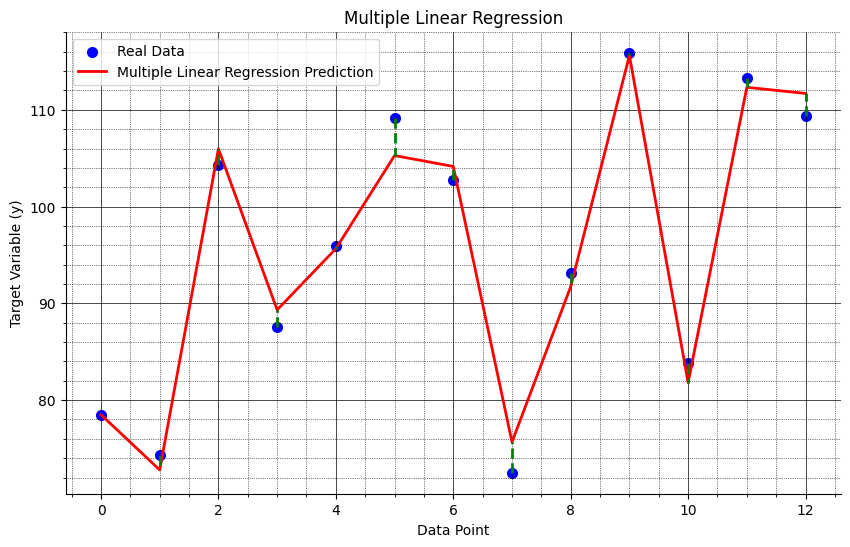

In [ ]:
# GENERATE THE FIGURE OF THE MULTIPLE LINEAR REGRESION
mlr_figure(df, y_pred)

To obtain a best visualization of the error or diference between the real data and the predicted data, we can graph a figure of residuals.

In [ ]:
# CALCULATE THE RESIDUALS
residual = df['y'] - y_pred

In [ ]:
def mlr_residual_figure (prediction, residuals):
  zeros = np.zeros(len(residuals))

  # CREATE RESIDUALS FIGURE
  plt.figure(figsize=(10,6))

  # RESIDUALS
  plt.scatter(prediction, residuals, color='blue', linewidths=2)

  # REFERENCE LINE
  plt.axhline(y=0, color='red')

  # RESIDUAL DISTANCE TO REFERENCE LINE
  plt.plot([prediction, prediction], [zeros, residuals], color='green', linestyle='--', linewidth=2)

  # TAGS
  plt.xlabel('Model Predictions')
  plt.ylabel('Residuals')
  plt.title('Residuals Plot')

  # GRID
  plt.minorticks_on()
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

  # REMOVE THE TOP AND LEFT BORDES
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)

  # DISPLAY FIGURE
  plt.show()

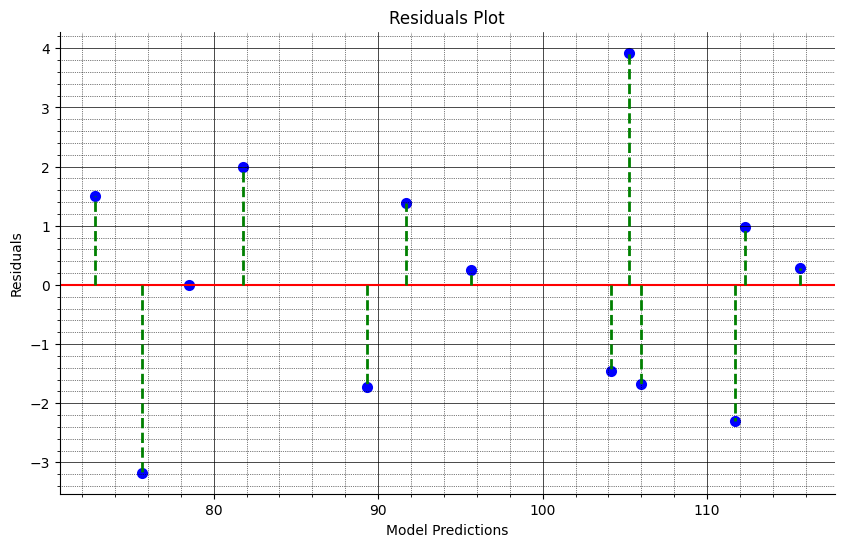

In [ ]:
# GENERATE THE RESIDUALS FIGURE
mlr_residual_figure(y_pred, residual)

Other whay to create a model of multiple linear regresion is through the several libraries such as sklearn, olm, and so on.

In [ ]:
# IDENTIFY THE FEATURES AND THE LABELS
X = df.drop('y', axis=1)
y = df['y']

# CONSTRUCT THE MODEL
mLr_model = LinearRegression()

# TRAIN THE MODEL
mLr_model.fit(X, y)

# OBTAIN PREDICTIONS
y_pred = mLr_model.predict(X)

# DISPLAY THE INTERCEPT, COEFFICIENTS AND THE R-SQUARED METRIC
print("Intercept:", mLr_model.intercept_)
print("Coefficients:", mLr_model.coef_)
print("R-squared:", mLr_model.score(X, y))

Intercept: 62.4053692999176
Coefficients: [ 1.55110265  0.51016758  0.1019094  -0.14406103]
R-squared: 0.9823756204076801


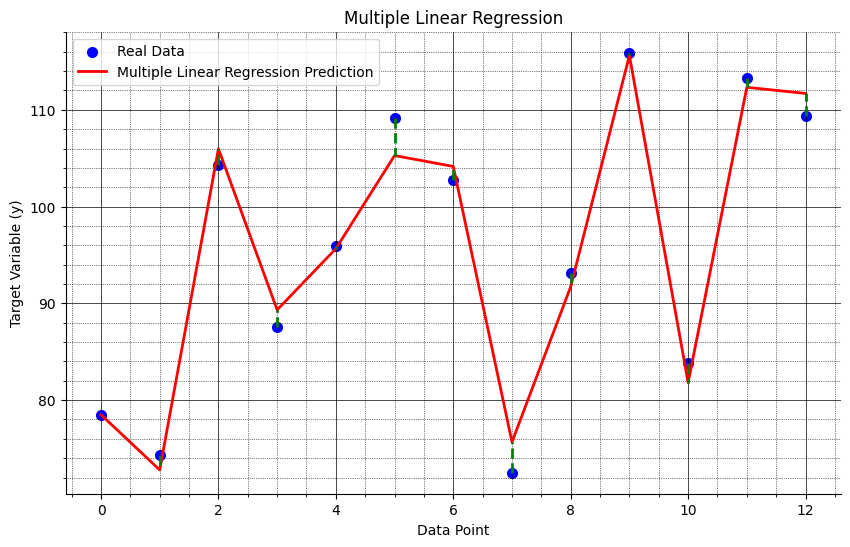

In [ ]:
# GENERATE THE MULTIPLE LINEAR REGRESSION FIGURE
mlr_figure(df, y_pred)

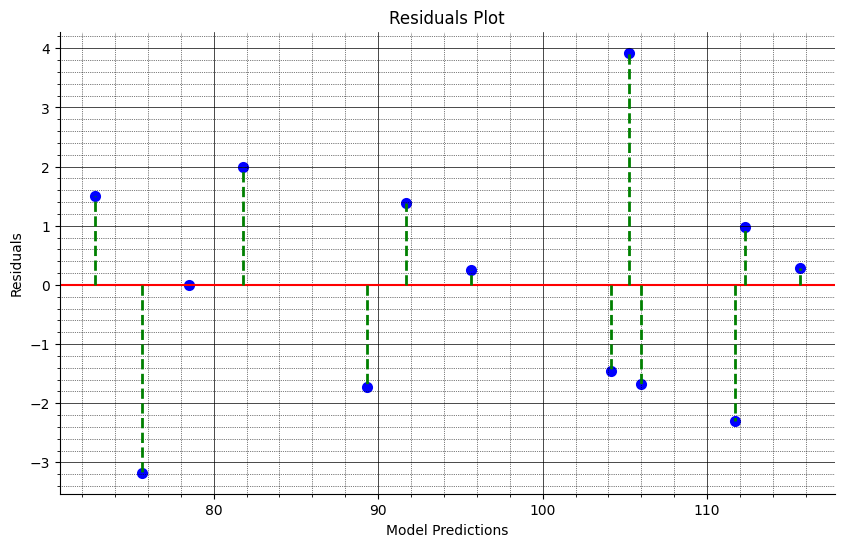

In [ ]:
# GENERATE THE RESIDUALS FIGURE
mlr_residual_figure(y_pred, residual)